In [ ]:
imagePath = "/content/drive/MyDrive/Nhom6_TTNT/Data"
#Đọc ảnh và nhãn
images = []
labels = []
classPaths = os.listdir(imagePath)

# Duyệt các folder
for classFolder in classPaths:
    classImagePath = os.path.join(imagePath, classFolder)
    label = classFolder[-1]
    # Duyệt tất cả ảnh trong mỗi folder
    for imageName in os.listdir(classImagePath):
        image = cv2.imread(os.path.join(classImagePath, imageName))
        image = cv2.resize(image, (32, 32))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image / 255.0
        images.append(image)
        labels.append(label)

imageCount = len(images)
images = np.array(images)
labels = np.array(labels)
images = images.reshape(-1, 32, 32, 1)
print(images)
print(labels)
print(f"Number of images: {imageCount}")
print(images.dtype)
print(images.shape)


[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [ ]:
# convert labels from string to integer for model input

def stringToInt(char):
    charToInt = {
        "A": 10, "B": 11, "C": 12, "D": 13, "E": 14, "F": 15, "G": 16, "H": 17,
        "I": 18, "J": 19, "K": 20, "L": 21, "M": 22, "N": 23, "O": 24, "P": 25,
        "Q": 26, "R": 27, "S": 28, "T": 29, "U": 30, "V": 31, "W": 32, "X": 33,
        "Y": 34, "Z": 35
    }
    return charToInt[char]

def convertLabels(labelList):
    convertedLabels = []
    for label in labelList:
        if label.isalpha():
            convertedLabels.append(stringToInt(label))
        else:
            convertedLabels.append(int(label))
    return convertedLabels

newLabels = convertLabels(labels)
newLabels = np.array(newLabels, dtype=int)

print(newLabels)


[32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 35 35 35
 35 35 35 35 35 35 35 35 35 35 35 35 33 33 33 33 33 33 33 33 33 33 33 33
 33 33 33 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 34 34 34 34 34 34
 34 34 34 34 34 34 34 34 34 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 13 13 13 13 13 13 13 13 13 13 13 13 13 13

In [ ]:
# convert integer to character
def intToString(num):
    intToChar = {
        10: "A", 11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H",
        18: "I", 19: "J", 20: "K", 21: "L", 22: "M", 23: "N",
        24: "O", 25: "P", 26: "Q", 27: "R", 28: "S",
        29: "T", 30: "U", 31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z"
    }
    return intToChar[num]

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Split data into training and testing sets
imageTrain, imageTest, labelTrain, labelTest = train_test_split(images, newLabels, test_size=0.2, random_state=42)

trainLabelSet = set(labelTrain)
testLabelSet = set(labelTest)
missingLabels = testLabelSet - trainLabelSet

print("Labels in test set but not in training set:", missingLabels)


Labels in test set but not in training set: set()


In [ ]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(imageCount, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(imageTrain, labelTrain, epochs=60, batch_size=42, validation_data=(imageTest, labelTest))


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.0055 - loss: 6.1898 - val_accuracy: 0.0370 - val_loss: 5.1084
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0337 - loss: 5.0627 - val_accuracy: 0.0093 - val_loss: 4.1608
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0282 - loss: 4.4105 - val_accuracy: 0.0185 - val_loss: 3.8803
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0361 - loss: 4.0675 - val_accuracy: 0.0093 - val_loss: 3.8350
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0324 - loss: 3.8920 - val_accuracy: 0.0370 - val_loss: 3.7145
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0461 - loss: 3.8206 - val_accuracy: 0.0556 - val_loss: 3.6702
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0321 - loss: 3.7601 - val_accuracy: 0.0463 - val_loss: 3.6226
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0395 - loss: 3.6847 - val_accuracy: 0.0185 - 

In [ ]:
loss, accuracy = model.evaluate(imageTest, labelTest)
print(f'Test Accuracy: {accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3035 - loss: 3.2551
Test Accuracy: 0.31


In [ ]:
# Extract features
features = []
for img in images:
    img = cv2.resize(img, (32, 32))
    img = img.astype(np.float32)
    img = img / 255.0
    imgArray = np.expand_dims(img, axis=0)
    imgArray = np.expand_dims(imgArray, axis=-1)
    features.append(model.predict(imgArray))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [ ]:
print(features)
features = np.array(features)
print(features.dtype)
print(features.shape)

[array([[2.07507415e-04, 4.22111857e-09, 1.43225563e-07, 4.81643045e-04,
        1.92904309e-03, 3.07069290e-02, 3.12689841e-02, 5.62659110e-08,
        2.73733675e-01, 6.28167822e-04, 1.18608028e-03, 2.39132926e-01,
        1.19616278e-03, 2.58656684e-03, 2.76221498e-03, 1.48099090e-03,
        4.82433988e-03, 4.20627912e-05, 1.46563678e-10, 5.34243760e-10,
        4.56247129e-04, 1.47400592e-09, 8.63489881e-02, 1.59512386e-02,
        1.77274225e-03, 1.55450642e-01, 4.52997815e-03, 8.55580941e-02,
        4.51913290e-02, 2.24969681e-05, 4.38339430e-06, 6.66314963e-06,
        1.24056116e-02, 1.28972140e-04, 4.47619641e-06, 6.26112978e-07,
        2.33161129e-10, 8.19930304e-11, 2.43259357e-10, 4.74019123e-11,
        5.36247262e-12, 3.89760585e-11, 6.37199737e-11, 1.97192818e-11,
        2.99555281e-12, 3.10983933e-10, 9.98957236e-11, 2.10830423e-10,
        1.09787672e-10, 1.40998130e-10, 7.78219100e-10, 7.70422129e-11,
        2.74101141e-11, 1.92055469e-11, 4.62315707e-11, 2.16872

In [ ]:
features = features.reshape(len(features), -1)
print(features.shape)
print(features)

(540, 540)
[[2.0750742e-04 4.2211186e-09 1.4322556e-07 ... 4.5262804e-11
  5.6609977e-11 2.5477162e-11]
 [2.0422619e-04 4.0112131e-09 1.3952771e-07 ... 4.3479352e-11
  5.3894934e-11 2.4586062e-11]
 [2.0515746e-04 3.9361927e-09 1.4351994e-07 ... 4.3661481e-11
  5.4329301e-11 2.4459707e-11]
 ...
 [2.0339183e-04 4.5112269e-09 1.5779364e-07 ... 4.8378412e-11
  5.9825117e-11 2.6981549e-11]
 [2.0804111e-04 4.4727009e-09 1.5001088e-07 ... 4.7182286e-11
  5.8933948e-11 2.6505258e-11]
 [2.0856847e-04 4.4870436e-09 1.4952613e-07 ... 4.7427305e-11
  5.8675599e-11 2.6516615e-11]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Chia dữ liệu train/test cho mô hình KNN
featuresTrain, featuresTest, labelsKnnTrain, labelsKnnTest = train_test_split(features, newLabels, test_size=0.2, random_state=42)

# Huấn luyện mô hình KNN dùng vector đặc trưng từ CNN
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(featuresTrain, labelsKnnTrain)

# Dự đoán và tính độ chính xác
yPred = knnModel.predict(featuresTest)
accuracy = accuracy_score(labelsKnnTest, yPred)
print(f"KNN model accuracy: {accuracy * 100:.2f}%")


KNN model accuracy: 12.96%


In [ ]:

def processImage(img):
    img = img / 255.0
    img = np.array(img)
    imgArray = np.expand_dims(img, axis=0)
    imgArray = np.expand_dims(imgArray, axis=-1)
    feature = model.predict(imgArray)
    feature = np.array(feature)
    feature = feature.reshape(1, -1)
    prediction = knnModel.predict(feature)
    return prediction[0]

Skew angle: -2.0000076


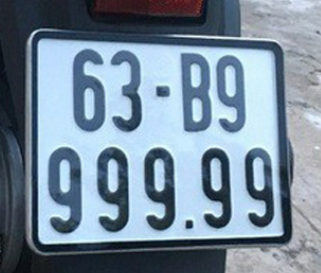

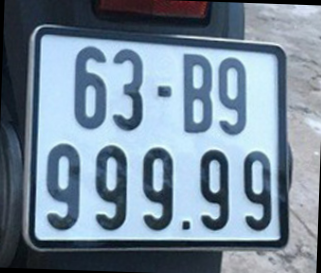

In [ ]:
def processSkew(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  _, gray = cv2.threshold(gray, 127, 255, cv2. THRESH_BINARY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edges = cv2.Canny(blurred, 50, 150)
  lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
  angle = 0
  if lines is not None:
    for rho, theta in lines[:, 0]:
      angle = np.degrees(theta) - 90
      break

  print("Skew angle: " + str(angle))

  # Rotate ảnh
  (h, w) = img.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img, M, (w, h))
  return rotated

skewedImage = cv2.imread("/content/drive/MyDrive/Nhom6_TTNT/anhNghieng.jpg")

rotatedImage = processSkew(skewedImage)
cv2_imshow(skewedImage)
cv2_imshow(rotatedImage)




Saving BienSo3.jpg to BienSo3.jpg
Uploaded image: BienSo3.jpg
Skew angle: 0


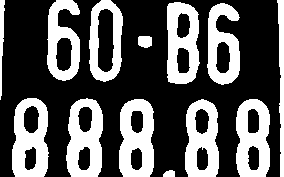

Số ký tự tìm được: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Recognized license plate characters:
['J', 'J', 'J', 'M', 'J', 'J', 'J', 'J', 'J']


In [ ]:
recognizedChars = []

def extractCharsAndProcess(path):
    global recognizedChars
    recognizedChars = []

    # Đọc và nắn thẳng ảnh
    image = cv2.imread(path)
    image = processSkew(image)

    # Chuyển xám + làm mượt
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Nhị phân (chữ sáng, nền tối)
    _, thresh = cv2.threshold(
        gray, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    cv2_imshow(thresh)   # Xem thử ảnh sau khi nhị phân

    # Tìm contour ký tự
    contours, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    boxes = []
    h_img, w_img = thresh.shape

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h

        # Bỏ các vùng quá nhỏ
        if area < 50:
            continue

        # Chiều cao ký tự phải chiếm 30%–95% chiều cao biển
        if h < 0.3 * h_img or h > 0.95 * h_img:
            continue

        aspect = h / float(w + 1e-5)

        # Ký tự thường cao hơn rộng
        if aspect < 1.0 or aspect > 7.0:
            continue

        boxes.append((x, y, w, h))

    # Sắp xếp ký tự từ trái sang phải
    boxes = sorted(boxes, key=lambda b: b[0])

    print("Số ký tự tìm được:", len(boxes))

    for (x, y, w, h) in boxes:
        char_roi = thresh[y:y+h, x:x+w]
        # Resize về 32x32 giống lúc train
        char_roi = cv2.resize(char_roi, (32, 32))
        char_roi = char_roi.astype("float32")

        pred = processImage(char_roi)
        recognizedChars.append(pred)


from google.colab import files

def uploadAndRecognizeImage():
    global recognizedChars
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded.")
        return
    imagePath = list(uploaded.keys())[0]
    print(f"Uploaded image: {imagePath}")
    extractCharsAndProcess(imagePath)
    for i in range(len(recognizedChars)):
        if recognizedChars[i] > 9:
            recognizedChars[i] = intToString(recognizedChars[i])
        else:
            recognizedChars[i] = str(recognizedChars[i])
    print("Recognized license plate characters:")
    print(recognizedChars)


uploadAndRecognizeImage()
